In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt

In [3]:
file = np.loadtxt(r"E:\data analysis and ML\for github\Well-X\Well-X.LAS" , skiprows=45)
cols = [ "DEPTH" , "CALI"  , "DT"  , "GR"   ,   "ILD"    ,     "ILM"     ,    "NPHI"    ,     "PEF"    ,  "RHOB" ]

data = pd.DataFrame( data=file , columns=cols)
data[data==-9999.0000] = np.nan
data[data==-99.9900] = np.nan
data = data[["DEPTH" , "GR" ,"DT" , "NPHI" , "PEF" , "ILD" , "ILM" , "RHOB"]]
data = data.rename(columns={"ILM" : "LLS" ,  "ILD" : "LLD" , })
data

,DEPTH,GR,DT,NPHI,PEF,LLD,LLS,RHOB
0,2372.0759,9.39,51.13,-0.0181,7.66,596.87,687.37,2.97
1,2372.2283,10.49,51.12,-0.0181,7.52,709.12,617.00,2.98
2,2372.3807,11.47,51.16,-0.0179,9.67,678.87,585.50,2.98
3,2372.5331,12.65,51.19,-0.0177,8.75,653.75,524.87,2.98
4,2372.6855,13.69,51.18,-0.0176,8.53,626.12,506.62,2.97
...,...,...,...,...,...,...,...,...
7801,3560.9485,31.58,68.65,0.0431,8.92,7.17,12.74,2.64
7802,3561.1009,31.58,68.65,0.0433,8.10,7.18,12.78,2.64
7803,3561.2533,31.58,68.65,0.0435,7.56,7.20,12.70,2.64
7804,3561.4057,31.58,68.65,0.0433,6.88,10.88,12.63,2.65


In [4]:
data.describe()

,DEPTH,GR,DT,NPHI,PEF,LLD,LLS,RHOB
count,7806.000000,7803.000000,7798.000000,7794.000000,7794.000000,7803.000000,7803.000000,7794.000000
mean,2966.817019,37.108070,73.071153,0.134376,7.244374,235.092355,187.055145,2.533254
std,343.439923,26.025362,14.953646,0.118514,6.165887,586.368400,436.745956,0.250139
min,2372.075900,2.810000,41.510000,-0.023900,2.530000,0.150000,0.220000,1.420000
25%,2669.446500,16.555000,63.700000,0.009000,5.520000,2.050000,2.210000,2.420000
50%,2966.817000,32.780000,70.190000,0.137450,6.330000,7.360000,8.140000,2.520000
75%,3264.187600,54.280000,81.677500,0.218400,7.620000,50.980000,60.290000,2.620000
max,3561.558100,180.750000,150.810000,0.590800,177.690000,2000.689900,2000.689900,3.050000


Loading well tops


In [5]:
wellTops = pd.read_excel(r"E:\data analysis and ML\for github\Well-X\Well-X_Tops.xls" ,skiprows=0)
wellTops

,Common Well Name,* Name,Depth (meters)
0,Well-X,Formation-A,2386.6280
1,Well-X,Formation-B,2456.1377
2,Well-X,Formation-C,2500.2285
3,Well-X,Member-1,2507.5410
4,Well-X,Formation-D,2558.4407


Setuup plot and Plotting

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3552\2541902657.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((1,25),(0,0),colspan=2)
c:\Python310\lib\site-packages\matplotlib\ticker.py:2954: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


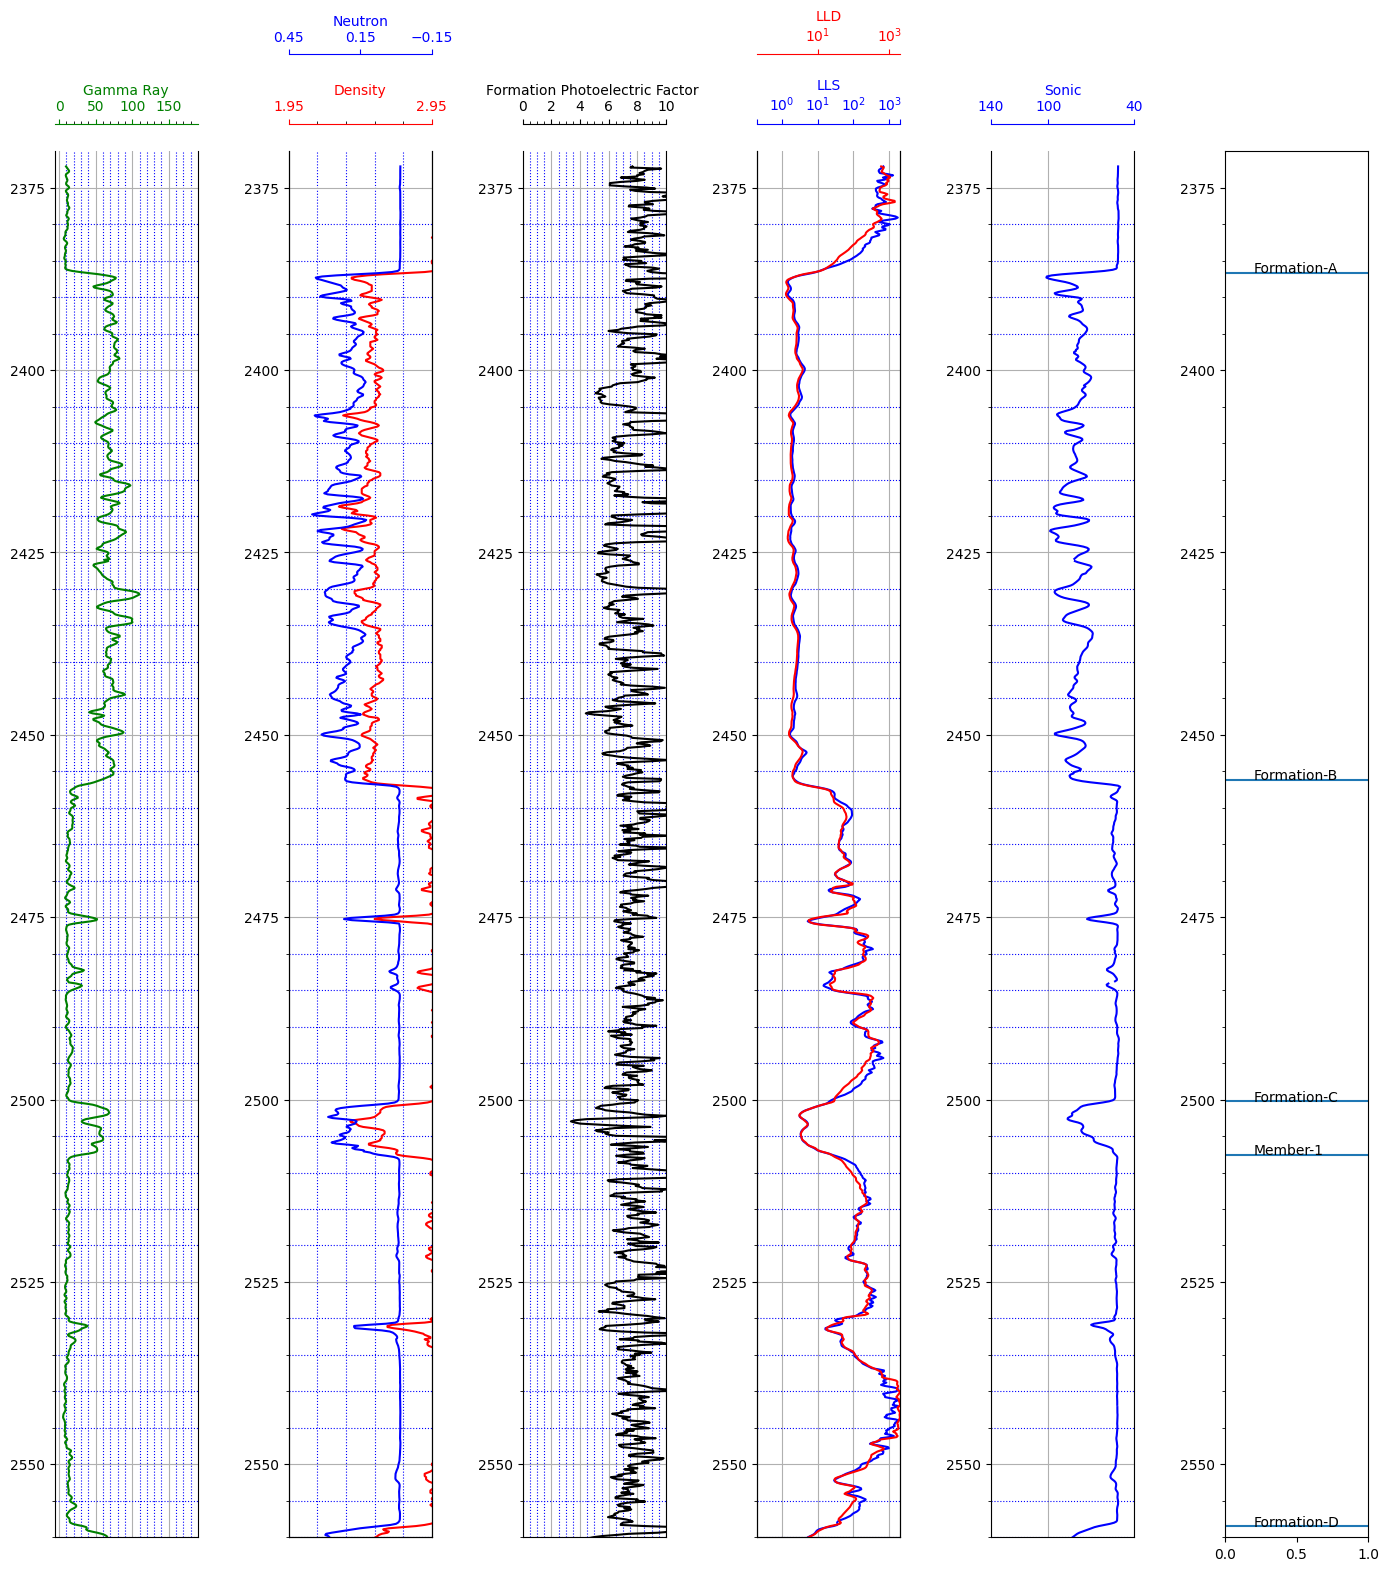

In [8]:
fig , ax = plt.subplots(figsize=(25,18)) 

# plots parameters
ax1 = plt.subplot2grid((1,25),(0,0),colspan=2)
ax2 = plt.subplot2grid((1,25),(0,3),colspan=2 , sharey = ax1)
ax3 = ax2.twiny()
ax4 = plt.subplot2grid((1,25),(0,6),colspan=2, sharey = ax1)
ax5 = plt.subplot2grid((1,25),(0,9),colspan=2, sharey = ax1)
ax6 = ax5.twiny()
ax7 = plt.subplot2grid((1,25),(0,12),colspan=2, sharey = ax1)

# Formation top track
ax8 = plt.subplot2grid((1,25),(0,15),colspan=2, rowspan=1, sharey = ax1)


# general parameters
for ax in [ax1 , ax2 , ax4 , ax5,ax7]:
    ax.grid(which="major")
    ax.grid(which="minor" , linestyle = "dotted" , color = "blue")
    ax.minorticks_on()
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")

# GR track
ax1.plot(data["GR"] , data["DEPTH"] , color = "green")
ax1.set_ylim(2560 ,2370)
ax1.set_xlabel("Gamma Ray")
ax1.xaxis.label.set_color("green")
ax1.xaxis.set_ticks([0 , 50 , 100 , 150])
ax1.tick_params(axis="x" , colors = "green")
ax1.spines["top"]
ax1.spines["top"].set_edgecolor("green")
ax1.spines["top"].set_position(("axes" , 1.02))

# Density Nutron track
    # Density track
ax2.plot(data["RHOB"] , data["DEPTH"] , color = "red")
ax2.set_xlabel("Density")
ax2.xaxis.label.set_color("red")
ax2.set_xlim(1.95 , 2.95)
ax2.xaxis.set_ticks([1.95 , 2.95])
ax2.tick_params(axis="x" , colors = "red")
ax2.spines["top"]
ax2.spines["top"].set_edgecolor("red")
ax2.spines["top"].set_position(("axes" , 1.02))

    # Neutron track
ax3.plot(data["NPHI"] , data["DEPTH"] , color = "blue")
ax3.set_xlabel("Neutron")
ax3.xaxis.label.set_color("blue")
ax3.set_xlim(0.45 , -0.15)
ax3.xaxis.set_ticks([0.45 ,0.15 ,-0.15])
ax3.tick_params(axis="x" , colors = "blue")
ax3.spines["top"]
ax3.spines["top"].set_edgecolor("blue")
ax3.spines["top"].set_position(("axes" , 1.07))

# PEF track

ax4.plot(data["PEF"] , data["DEPTH"] , color = "black")
ax4.set_xlabel("Formation Photoelectric Factor ")
ax4.xaxis.label.set_color("black")
ax4.set_xlim(1 , 10)
ax4.xaxis.set_ticks([0 , 2 , 4 , 6,8,10])
ax4.tick_params(axis="x" , colors = "black")
ax4.spines["top"]
ax4.spines["top"].set_edgecolor("black")
ax4.spines["top"].set_position(("axes" , 1.02))

# Resistivity track
    # LLS curve
ax5.plot(data["LLS"] , data["DEPTH"] , color = "blue")
ax5.set_xlabel("LLS")
ax5.xaxis.label.set_color("blue")
ax5.set_xlim(0.2 , 2000)
ax5.xaxis.set_ticks([0.2,1,10,100,1000,2000])
ax5.semilogx()
ax5.tick_params(axis="x" , colors = "blue")
ax5.spines["top"]
ax5.spines["top"].set_edgecolor("blue")
ax5.spines["top"].set_position(("axes" , 1.02))


   # LLD track
ax6.plot(data["LLD"] , data["DEPTH"] , color = "red")
ax6.set_xlabel("LLD")
ax6.xaxis.label.set_color("red")
ax6.set_xlim(0.2 , 2000)
ax5.xaxis.set_ticks([0.2,1,10,100,1000,2000])
ax6.semilogx()
ax6.tick_params(axis="x" , colors = "red")
ax6.spines["top"]
ax6.spines["top"].set_edgecolor("red")
ax6.spines["top"].set_position(("axes" , 1.07))


    # DT track
ax7.plot(data["DT"] , data["DEPTH"] , color = "blue")
ax7.set_xlabel("Sonic")
ax7.xaxis.label.set_color("blue")
ax7.set_xlim(140 , 40)
ax7.xaxis.set_ticks([140 ,100, 40])
ax7.tick_params(axis="x" , colors = "blue")
ax7.spines["top"]
ax7.spines["top"].set_edgecolor("blue")
ax7.spines["top"].set_position(("axes" , 1.02))
ax7.minorticks_on()




# #Formation Tops
for i in range(len(wellTops)):
    ax8.axhline(y=wellTops["Depth (meters)"][i] , xmin=0 , xmax=1, linestyle ="solid")
    ax8.text(0.2 , wellTops["Depth (meters)"][i] , wellTops["* Name"][i])
